### Here I'll show one pretty simple way to convert the "drawings" into a numpy array that you can use to train your models.

### Dependencies

In [1]:
import os
import ast
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load data

In [2]:
train = pd.DataFrame()
for file in os.listdir('../input/train_simplified/'):
    train = train.append(pd.read_csv('../input/train_simplified/' + file, index_col='key_id', nrows=1))

In [3]:
# You may choose the shape you want.
def drawing_to_np(drawing, shape=(64, 64)):
    # evaluates the drawing array
    drawing = eval(drawing)
    fig, ax = plt.subplots()
    # Close figure so it won't get displayed while transforming the set
    plt.close(fig)
    for x,y in drawing:
        ax.plot(x, y, marker='.')
        ax.axis('off')        
    fig.canvas.draw()
    # Convert images to numpy array
    np_drawing = np.array(fig.canvas.renderer._renderer)
    # If you want to take only one channel, you can try somethin like:
    # np_drawing = np_drawing[:, :, 1]    
    return cv2.resize(np_drawing, shape) # Resize array

### Applying the function

In [4]:
# One way you could apply the transformation to you dataset.
train['drawing_np'] = train['drawing'].map(drawing_to_np)
train['drawing_np2'] = train['drawing'].apply(drawing_to_np)

In [5]:
train.head(10)

,countrycode,drawing,recognized,timestamp,word,drawing_np,drawing_np2
key_id,,,,,,,
4745881255411712,US,"[[[92, 91, 82, 69, 64, 56, 28, 15, 6, 0, 1, 18...",True,2017-03-10 13:46:31.635970,sleeping bag,"[[[255, 255, 255, 0], [255, 255, 255, 0], [255...","[[[255, 255, 255, 0], [255, 255, 255, 0], [255..."
5546137161302016,GB,"[[[28, 110, 126, 106, 59, 37, 32, 25], [168, 1...",True,2017-03-29 12:39:34.815400,house plant,"[[[255, 255, 255, 0], [255, 255, 255, 0], [255...","[[[255, 255, 255, 0], [255, 255, 255, 0], [255..."
4801185506656256,BR,"[[[48, 119, 208, 222, 228, 209, 175, 80, 25, 7...",True,2017-01-26 00:40:23.964940,bathtub,"[[[255, 255, 255, 0], [255, 255, 255, 0], [255...","[[[255, 255, 255, 0], [255, 255, 255, 0], [255..."
5223042911305728,US,"[[[4, 0, 2], [202, 98, 24]], [[1, 12, 10, 25, ...",True,2017-03-18 02:52:34.909590,key,"[[[255, 255, 255, 0], [255, 255, 255, 0], [255...","[[[255, 255, 255, 0], [255, 255, 255, 0], [255..."
4848879067463680,US,"[[[69, 32, 19, 7, 0, 18, 55, 86, 145, 196, 209...",True,2017-03-06 15:00:27.328800,triangle,"[[[255, 255, 255, 0], [255, 255, 255, 0], [255...","[[[255, 255, 255, 0], [255, 255, 255, 0], [255..."
5480798142595072,US,"[[[38, 25, 13, 4, 0, 4, 12, 25, 32, 30], [29, ...",True,2017-03-05 13:27:18.160120,grapes,"[[[255, 255, 255, 0], [255, 255, 255, 0], [255...","[[[255, 255, 255, 0], [255, 255, 255, 0], [255..."
5566648650039296,AU,"[[[121, 112, 99, 86, 67, 53, 51, 57, 68, 83, 9...",True,2017-03-26 07:09:16.547070,monkey,"[[[255, 255, 255, 0], [255, 255, 255, 0], [255...","[[[255, 255, 255, 0], [255, 255, 255, 0], [255..."
6141147657273344,US,"[[[7, 253, 255, 253, 250, 226, 187, 90, 1, 13,...",True,2017-01-25 16:22:32.336700,television,"[[[255, 255, 255, 0], [255, 255, 255, 0], [255...","[[[255, 255, 255, 0], [255, 255, 255, 0], [255..."
4551521905672192,IT,"[[[125, 125], [197, 197]], [[7, 0, 4, 28, 104,...",True,2017-03-11 13:01:38.075500,door,"[[[255, 255, 255, 0], [255, 255, 255, 0], [255...","[[[255, 255, 255, 0], [255, 255, 255, 0], [255..."


### Let's look at the new features.

First the original drawing

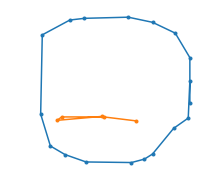

In [6]:
drawings = [ast.literal_eval(pts) for pts in train['drawing'].head(1).values]

plt.figure(figsize=(10, 10))
for i, drawing in enumerate(drawings):
    plt.subplot(330 + (i+1))
    for x,y in drawing:
        plt.plot(x, y, marker='.')
        plt.axis('off')

Now the drawing with the generated with the function applied with the 1st form.

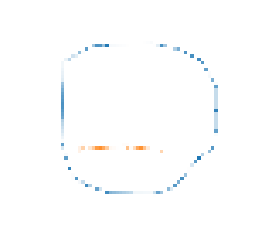

Image shape: (64, 64, 4)


In [7]:
# Function to plot images.
def plot_image(image_array):
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111, frameon=False)
    ax2.imshow(image_array)
    plt.axis('off')
    plt.show()
    print('Image shape:', image_array.shape)

sample_1 = train['drawing_np'].values[0]
plot_image(sample_1)

Now the drawing with the generated with the function applied with the 2nd form.

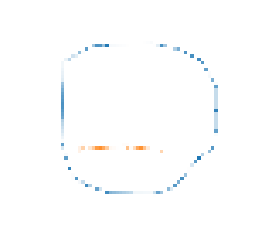

Image shape: (64, 64, 4)


In [8]:
sample_2 = train['drawing_np2'].values[0]
plot_image(sample_2)

Now you can use your new features to feed your models, good luck!